In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import json

clinical_data_path = '/content/drive/My Drive/DL Reproducibility Project/tmp/original_clinical_dataset.json'

with open(clinical_data_path) as f:
  clinical_data = json.load(f)

cases = []
for i in range(len(clinical_data)):
  id = clinical_data[i]['demographic']['submitter_id'][0:12]
  cases.append(id)

print(cases[0:5])

biospec_path = '/content/drive/My Drive/DL Reproducibility Project/MultimodalPrognosis/data/processed/pancancer_biospecimen.csv'

# load biospecimen data and create project vector
import pandas as pd
csv_file = pd.read_csv(biospec_path)

csv_file['barcode2'] = csv_file['barcode'].str.slice(0, 12, 1) 

project = []

for case in cases:
  
  a = csv_file[csv_file['barcode2'] == str(case)]['project']
  if len(a) > 0:
    a = a.iloc[0]
    a = a[5:]
    project.append(a)
  else:
    project.append(None)


['TCGA-CJ-4885', 'TCGA-AK-3444', 'TCGA-A3-3319', 'TCGA-J9-A8CM', 'TCGA-HC-7075']


In [0]:
# count the number of clinical data cases
rango = np.arange(1, (len(clinical_data)))
vital_status = {'vital_status': [clinical_data[i]["demographic"]['vital_status'] for i in rango]}

race = {'race': [clinical_data[i]["demographic"]['race'] for i in rango]}
gender = {'gender': [clinical_data[i]["demographic"]['gender'] for i in rango]}
age = {'age': [clinical_data[i]["demographic"]['age_at_index'] for i in rango]}
#get days to death
days_to_death = {'days_to_death': ['null' for i in rango]}
#get days to death
df_days = pd.DataFrame(days_to_death, columns=['days_to_death'])
for i in rango:
  if "days_to_death" in clinical_data[i-1]["demographic"]:
    x = [clinical_data[i-1]["demographic"]["days_to_death"]]
    df_days.iloc[i-2, df_days.columns.get_loc('days_to_death')] = x[0]

df_vital = pd.DataFrame(vital_status, columns=['vital_status'])
df_race = pd.DataFrame(race, columns=['race'])
df_gender = pd.DataFrame(gender, columns=['gender'])
df_age = pd.DataFrame(age, columns=['age'])
result = pd.concat([df_vital, df_race, df_gender,df_age,df_days], axis=1, sort=False)

for i in rango:
  if (result.iloc[i-1, result.columns.get_loc('vital_status')] == 'Alive'):
    result.iloc[i-1, result.columns.get_loc('days_to_death')] = 0;


In [0]:
# A: survival target data missing
r = 0;
for i in rango:
  if (np.isreal(result.iloc[i-1, result.columns.get_loc('days_to_death')])):
    r = r+1
r
survival_target_data_missing = len(result) - r

In [0]:
# B: Clinical data missing
gender_not = np.array([])
vital_not = np.array([])
race_not = np.array([])
age_not = np.array([])
for i in rango:
  if result.iloc[i-1, result.columns.get_loc('vital_status')] != 'Alive':
    if result.iloc[i-1, result.columns.get_loc('vital_status')] != 'Dead':
      vital_not = np.append(vital_not, i)

for i in rango:
  if result.iloc[i-1, result.columns.get_loc('race')] == 'not reported':
      race_not = np.append(race_not, i)

for i in rango:
  if result.iloc[i-1, result.columns.get_loc('gender')] == 'not reported':
      gender_not = np.append(gender_not, i)

for i in rango:
  if result.iloc[i-1, result.columns.get_loc('age')] == 'not reported':
    age_not = np.append(age_not, i)

combined = np.array([])
combined = np.append(vital_not, race_not)
combined = np.append(combined, age_not)
combined = np.append(combined, gender_not)
combined = np.unique(combined)
missing_cases = len(combined)


In [0]:
#Code for graphs A
rango = np.arange(1, (len(clinical_data)))
primary_diagnosis = {'primary_diagnosis': [clinical_data[i]["diagnoses"][0]['primary_diagnosis'] for i in rango]}
vital_status = {'vital_status': [clinical_data[i]["demographic"]['vital_status'] for i in rango]}
days_to_death = {'days_to_death': [0 for i in rango]}
#get days to death
df_days = pd.DataFrame(days_to_death, columns=['days_to_death'])
for i in rango:
  if "days_to_death" in clinical_data[i-1]["demographic"]:
    x = [clinical_data[i-1]["demographic"]["days_to_death"]]
    df_days.iloc[i-2, df_days.columns.get_loc('days_to_death')] = x[0]

df_primary = pd.DataFrame(primary_diagnosis, columns=['primary_diagnosis'])
df_vital = pd.DataFrame(vital_status, columns=['vital_status'])
result = pd.concat([df_primary, df_vital, df_days], axis=1, sort=False)

In [0]:
project_names_first = ['ACC', 'BRCA', 'CESC', 'DLBC', 'KICH', 'KIRC', 'KIRP', 'OV', 'PCPG', 'PRAD', 'SARC', 'SKCM', 'TGCT', 'THCA', 'THYM', 'UCEC']
#removing PCPG
project_names_second = ['BLCA', 'CHOL', 'COAD', 'ESCA', 'GBM', 'HNSC', 'LGG', 'LIHC','LUAD', 'LUSC', 'MESO', 'PAAD', 'READ', 'STAD', 'UCS', 'UVM']
project_names_third = ['LUAD', 'LUSC', 'MESO', 'PAAD', 'READ', 'STAD', 'UCS', 'UVM']

In [0]:
#Code for graphs B

day_range = np.arange(1,11000)
rango = np.arange(0, (len(project)))
#project_names = ['ACC', 'CESC']
prob_all_stacked = np.arange(1,11000)
#project_names = ['ACC', 'CESC', 'DLBC', 'KICH', 'KIRC', 'KIRP', 'OV', 'PCPG', 'PRAD', 'SARC', 'SKCM', 'TGCT', 'THCA', 'THYM', 'UCEC']
for x in project_names_second:
  days_to_death_array = np.array([])
  index = np.array([])
  for i in rango:
    if (project[i] == x):
      days_to_death = result.iloc[i, result.columns.get_loc('days_to_death')]
      days_to_death_array = np.append(days_to_death_array, days_to_death)
      number_patients = len(days_to_death_array)
      index = np.append(index, i)
      probability = np.array([])
      for r in day_range:
        dead = 0
        for j in range(number_patients):
          if days_to_death_array[int(j)] <= r:
            if days_to_death_array[int(j)]  != 0:
              dead = dead +1
        probability = np.append(probability, 1 - (dead/number_patients))
  print(x)
  prob_all_stacked = np.vstack([prob_all_stacked, probability])

print(probability)
print(prob_all_stacked)
  

In [0]:
# WORKING : PRUEBAS CON LA NUEVA K-M SURVIVAL CURVE
day_range = np.arange(1,11000)
rango = np.arange(0, (len(project)-1))
prob_all_stacked = np.arange(1,11000)
for x in project_names_first:
  days_to_death_array = np.array([])
  index = np.array([])
  for i in rango:
    if (project[i] == x):
      days_to_death = result.iloc[i, result.columns.get_loc('days_to_death')]
      days_to_death_array = np.append(days_to_death_array, days_to_death)
      number_patients = len(days_to_death_array)
      index = np.append(index, i)
      probability = np.array([])
  alive = number_patients;
  alive_array = np.zeros(11000)
  alive_array[0] = number_patients
  for r in day_range:
    dead = 0
    for j in range(number_patients):
      if days_to_death_array[int(j)] == r:
        dead = dead +1
        alive = alive - 1
    alive_array[r] = alive
    #print(r)
    #print(dead)
    #print(alive)
    if r == 1:
      probability = np.append(probability,(alive_array[0] - dead)/alive_array[0])
    else:
      p2 = (alive_array[r-1] - dead)/alive_array[r-1]
      probability = np.append(probability, probability[r-2]*p2)
  print(x)
  prob_all_stacked = np.vstack([prob_all_stacked, probability])


ACC
BRCA
CESC
DLBC
KICH
KIRC
KIRP
OV
PCPG
PRAD
SARC
SKCM
TGCT
THCA
THYM
UCEC


In [0]:
if result.iloc[i, result.columns.get_loc('vital_status')] == 'Dead' or result.iloc[i, result.columns.get_loc('vital_status')] == 'Alive' :



'Dead'

In [0]:
# LIMPIO FUNCIONANDO MAL PRUEBAS CON LA NUEVA K-M SURVIVAL CURVE
project_names_prueba = ['BLCA']
day_range = np.arange(1,500)
rango = np.arange(0, (len(project)))
prob_all_stacked = np.arange(1,500)
for x in project_names_second:
  days_to_death_array = np.array([])
  index = np.array([])
  for i in rango:
    if (project[i] == x):
      days_to_death = result.iloc[i, result.columns.get_loc('days_to_death')]
      days_to_death_array = np.append(days_to_death_array, days_to_death)
      number_patients = len(days_to_death_array)
      index = np.append(index, i)
      probability = np.array([])
      alive = number_patients;
      alive_array = np.arange(0,500)
      alive_array[0] = number_patients
      for r in day_range:
        dead = 0
        for j in range(number_patients):
          if days_to_death_array[int(j)] == r:
            dead = dead +1
            alive = alive - 1
        alive_array[r] = alive
        print(r)
        print(dead)
        print(alive)
        print(alive_array)
        if r == 1:
          probability = np.append(probability,(number_patients - dead)/alive)
        else:
          #print(r)
          #print(probability[r-2])
          p2 = (alive_array[r-1] - dead)/alive_array[r-1] 
          probability = np.append(probability, probability[r-2]*p2)
          #print(probability)
      print(x)
      prob_all_stacked = np.vstack([prob_all_stacked, probability])

print(probability)
#print(prob_all_stacked)

[(0.0, 1.0), (1.0, 8000.0)]

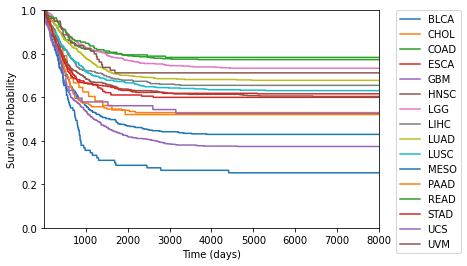

In [0]:
# SECOND

# gca stands for 'get current axis'
ax = plt.gca()

#df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)
plt.plot(day_range, np.transpose(prob_all_stacked[1, :]),label="BLCA")
plt.plot(day_range, np.transpose(prob_all_stacked[2, :]),label="CHOL")
plt.plot(day_range, np.transpose(prob_all_stacked[3, :]),label="COAD")
plt.plot(day_range, np.transpose(prob_all_stacked[4, :]),label="ESCA")
plt.plot(day_range, np.transpose(prob_all_stacked[5, :]),label="GBM")
plt.plot(day_range, np.transpose(prob_all_stacked[6, :]),label="HNSC")
plt.plot(day_range, np.transpose(prob_all_stacked[7, :]),label="LGG")
plt.plot(day_range, np.transpose(prob_all_stacked[8, :]),label="LIHC")

plt.plot(day_range, np.transpose(prob_all_stacked[9, :]),label="LUAD")
plt.plot(day_range, np.transpose(prob_all_stacked[10, :]),label="LUSC")
plt.plot(day_range, np.transpose(prob_all_stacked[11, :]),label="MESO")
plt.plot(day_range, np.transpose(prob_all_stacked[12, :]),label="PAAD")
plt.plot(day_range, np.transpose(prob_all_stacked[13, :]),label="READ")
plt.plot(day_range, np.transpose(prob_all_stacked[14, :]),label="STAD")
plt.plot(day_range, np.transpose(prob_all_stacked[15, :]),label="UCS")
plt.plot(day_range, np.transpose(prob_all_stacked[16, :]),label="UVM")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')

ax.set(xlim=(1, 8000), ylim=(0, 1))
#plt.show()

[(0.0, 1.0), (0.0, 12000.0)]

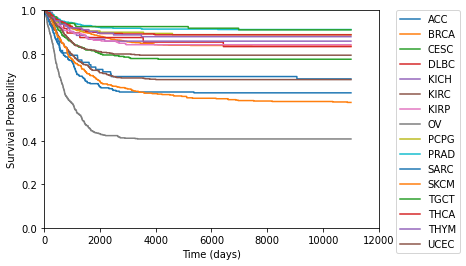

In [0]:
# FIRST

# gca stands for 'get current axis'
ax = plt.gca()

#df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)
plt.plot(day_range, np.transpose(prob_all_stacked[1, :]),label="ACC")
plt.plot(day_range, np.transpose(prob_all_stacked[2, :]),label="BRCA")
plt.plot(day_range, np.transpose(prob_all_stacked[3, :]),label="CESC")
plt.plot(day_range, np.transpose(prob_all_stacked[4, :]),label="DLBC")
plt.plot(day_range, np.transpose(prob_all_stacked[5, :]),label="KICH")
plt.plot(day_range, np.transpose(prob_all_stacked[6, :]),label="KIRC")
plt.plot(day_range, np.transpose(prob_all_stacked[7, :]),label="KIRP")
plt.plot(day_range, np.transpose(prob_all_stacked[8, :]),label="OV")
plt.plot(day_range, np.transpose(prob_all_stacked[9, :]),label="PCPG")
plt.plot(day_range, np.transpose(prob_all_stacked[10, :]),label="PRAD")
plt.plot(day_range, np.transpose(prob_all_stacked[11, :]),label="SARC")
plt.plot(day_range, np.transpose(prob_all_stacked[12, :]),label="SKCM")
plt.plot(day_range, np.transpose(prob_all_stacked[13, :]),label="TGCT")
plt.plot(day_range, np.transpose(prob_all_stacked[14, :]),label="THCA")
plt.plot(day_range, np.transpose(prob_all_stacked[15, :]),label="THYM")
plt.plot(day_range, np.transpose(prob_all_stacked[16, :]),label="UCEC")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')

#plt.plot(day_range, probability_papi)
ax.set(xlim=(0, 12000), ylim=(0, 1))
#plt.show()